#  Капитанов Даниил Сергеевич ИУ5-24М

Необходимо подготовить отчет по рубежному контролю и разместить его в Вашем репозитории. Вы можете использовать титульный лист, или в начале ноутбука в текстовой ячейке указать Ваши Ф.И.О. и группу.
Тема: Методы обучения с подкреплением.

Для одного из алгоритмов временных различий, реализованных Вами в соответствующей лабораторная работе:

    SARSA
    Q-обучение
    Двойное Q-обучение

осуществите подбор гиперпараметров. Критерием оптимизации должна являться суммарная награда.

## Код

In [1]:
! pip install tqdm
! pip install gym

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import gym 
from tqdm import tqdm 

In [3]:
class BasicAgent: 
    ''' 
    Базовый агент, от которого наследуются стратегии обучения 
    ''' 
    # Наименование алгоритма 
    ALGO_NAME = '---' 
    def __init__(self, env, eps=0.1): 
        # Среда         
        self.env = env         
        # Размерности Q-матрицы         
        self.nA = env.action_space.n         
        self.nS = env.observation_space.n 
        # и сама матрица 
        self.Q = np.zeros((self.nS, self.nA))         
        # Значения коэффициентов 
        # Порог выбора случайного действия         
        self.eps = eps 
        # Награды по эпизодам        
        self.episodes_reward = []    
    
    def print_q(self):        
        print('Вывод Q-матрицы для алгоритма ', self.ALGO_NAME)        
        print(self.Q) 
    
    def get_state(self, state): 
        ''' 
        Возвращает правильное начальное состояние 
        '''        
        # Если состояние вернулось с виде кортежа, то вернуть только номер состояния           
        return state[0] if type(state) is tuple else state  

    def greedy(self, state): 
        ''' 
        <<Жадное>> текущее действие 
        Возвращает действие, соответствующее максимальному Q-значению         для состояния state 
        '''         
        return np.argmax(self.Q[state]) 
 
    def make_action(self, state): 
        ''' 
        Выбор действия агентом 
        '''         
        if np.random.uniform(0,1) < self.eps: 
            # Если вероятность меньше eps то выбирается случайное действие             
            return self.env.action_space.sample()
        # иначе действие, соответствующее максимальному Q-значению
        return self.greedy(state) 
 
    def draw_episodes_reward(self): 
        # Построение графика наград по эпизодам         
        fig, ax = plt.subplots(figsize = (15,10))         
        y = self.episodes_reward         
        x = list(range(1, len(y)+1)) 
        plt.plot(x, y, '-', linewidth=1, color='green')         
        plt.title('Награды по эпизодам')         
        plt.xlabel('Номер эпизода')         
        plt.ylabel('Награда') 
        plt.show() 
        
def learn(): 
    ''' 
    Реализация алгоритма обучения 
    '''    
    pass 

In [4]:
class SARSA_Agent(BasicAgent):     
    ''' 
    Реализация алгоритма SARSA 
    ''' 
    # Наименование алгоритма 
    ALGO_NAME = 'SARSA' 
 
    def __init__(self, env, eps=0.015, lr=0.1, gamma=0.97, num_episodes=20000): 
        # Вызов конструктора верхнего уровня         
        super().__init__(env, eps) 
        # Learning rate         
        self.lr=lr 
        # Коэффициент дисконтирования         
        self.gamma = gamma         
        # Количество эпизодов         
        self.num_episodes=num_episodes         
        # Постепенное уменьшение eps         
        self.eps_decay = 0.00005         
        self.eps_threshold = 0.01 
 
    def learn(self): 
        ''' 
        Обучение на основе алгоритма SARSA 
        ''' 
        self.episodes_reward = []         
        # Цикл по эпизодам         
        for ep in tqdm(list(range(self.num_episodes))): 
            # Начальное состояние среды 
            state = self.get_state(self.env.reset())             
            # Флаг штатного завершения эпизода             
            done = False 
            # Флаг нештатного завершения эпизода             
            truncated = False 
            # Суммарная награда по эпизоду             
            tot_rew = 0 
 
            # По мере заполнения Q-матрицы уменьшаем вероятность случайного выбора действия 
            if self.eps > self.eps_threshold:                
                self.eps -= self.eps_decay 
            # Выбор действия        
            action = self.make_action(state)  
            
            # Проигрывание одного эпизода до финального состояния            
            while not (done or truncated): 
                # Выполняем шаг в среде                 
                next_state, rew, done, truncated, _ = self.env.step(action)  
                # Выполняем следующее действие  
                next_action = self.make_action(next_state)  
                    
                # Правило обновления Q для SARSA                 
                self.Q[state][action] = self.Q[state][action] + self.lr * (rew + self.gamma * self.Q[next_state][next_action] - self.Q[state][action]) 

                # Следующее состояние считаем текущим                 
                state = next_state                 
                action = next_action                 
                # Суммарная награда за эпизод                 
                tot_rew += rew                 
                if (done or truncated): 
                    self.episodes_reward.append(tot_rew) 
 

100%|██████████| 20000/20000 [00:10<00:00, 1914.90it/s]


Вывод Q-матрицы для алгоритма  SARSA
[[ -11.47885839  -11.43919449  -11.45019886  -11.44349111]
 [ -10.96227877  -10.86747106  -10.87185947  -10.90782833]
 [ -10.30553265  -10.21293064  -10.21859028  -10.28419446]
 [  -9.55700692   -9.50572394   -9.51060605   -9.66320622]
 [  -8.84814336   -8.77190254   -8.7805193    -8.79112299]
 [  -8.12074202   -8.01573448   -8.02679438   -8.03269718]
 [  -7.23905519   -7.23789869   -7.23852849   -7.32208829]
 [  -6.62527679   -6.43664116   -6.43785801   -6.45965085]
 [  -5.6251431    -5.60897331   -5.82118265   -5.69412161]
 [  -4.89343899   -4.74079869   -4.8696534    -4.86148421]
 [  -3.9639407    -3.84148481   -3.94036445   -4.40092142]
 [  -3.19073312   -3.12344654   -2.92358782   -3.33534239]
 [ -11.99038268  -10.96346241  -12.42575272  -11.68688347]
 [ -11.42850414  -10.27272232  -11.64501976  -11.78264399]
 [ -10.87091552   -9.56244238  -10.95844934  -11.06696657]
 [ -10.1387628    -8.83084413  -10.27831888  -10.41403858]
 [  -9.4894403    -

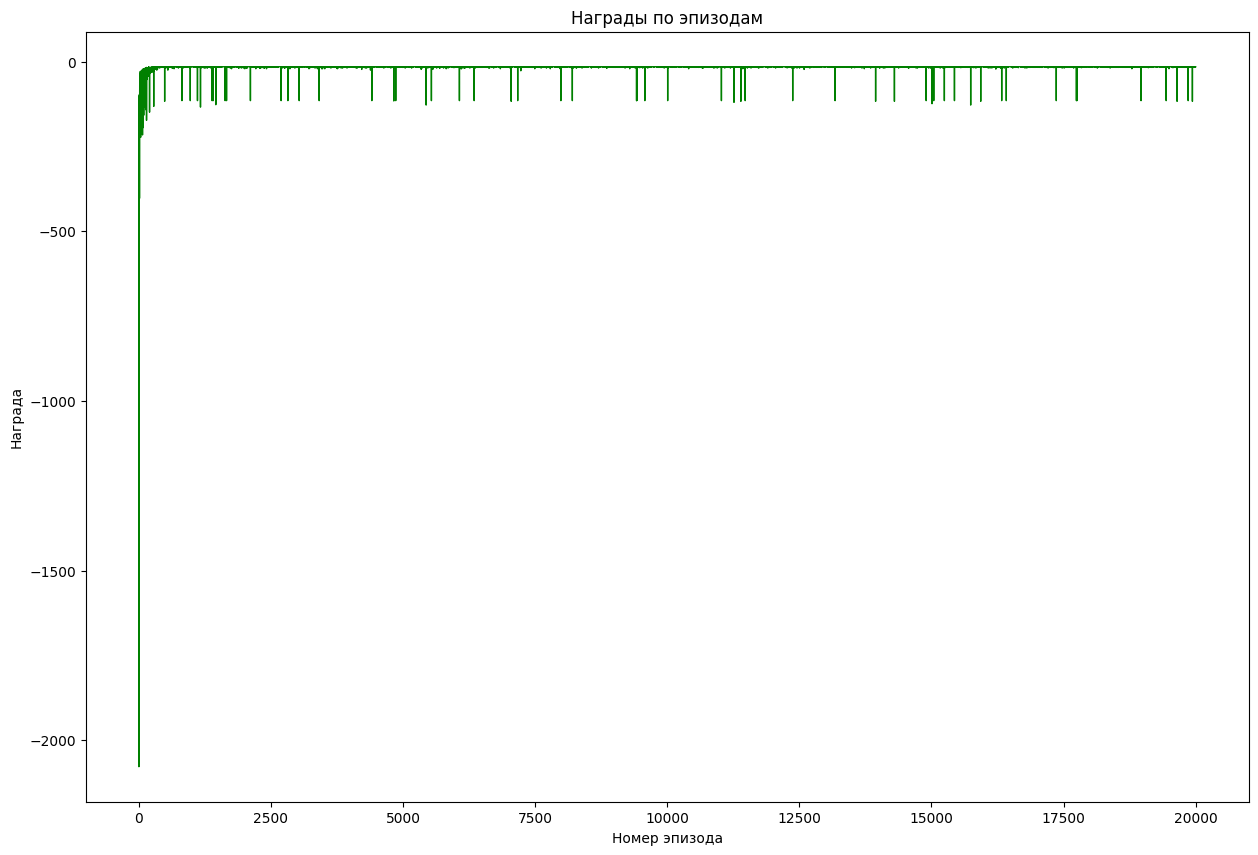

: 

In [5]:
def play_agent(agent): 
    ''' 
    Проигрывание сессии для обученного агента 
    ''' 
    env2 = gym.make('CliffWalking-v0', render_mode='human')      
    state = env2.reset()[0]     
    done = False     
    while not done: 
        action = agent.greedy(state)         
        next_state, reward, terminated, truncated, _ = env2.step(action)        
        env2.render()         
        state = next_state         
        if terminated or truncated: 
            done = True 
 
 
def run_sarsa(): 
    env = gym.make('CliffWalking-v0')      
    agent = SARSA_Agent(env)     
    agent.learn()     
    agent.print_q()     
    agent.draw_episodes_reward()     
    play_agent(agent) 
 
def main(): 
    run_sarsa()     
 
if __name__ == '__main__':     
    main() 

## Итог

В результате подбора гиперпараметров лучшими значеними оказались:

    self, env, eps=0.015, lr=0.1, gamma=0.97, num_episodes=20000

При этом при уменьшении eps стратегия агенда приближалась к максимальной (к движению по краю обрыва).